In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('height-weight.csv')

In [33]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


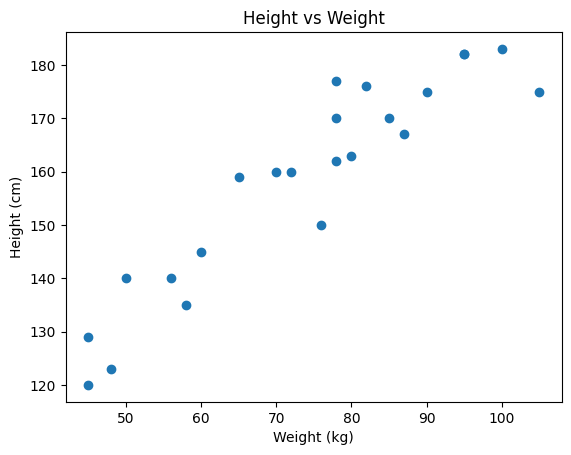

In [34]:
plt.scatter(df.Weight, df.Height)
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Height vs Weight')
plt.show()

In [35]:
#we see a linear relationship between height and weight
#divide the data into x and y
X = df[["Weight"]]
y = df.Height


In [36]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [37]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [40]:
#scaling the data
#standarize the data
#fit transform on training data and transform on test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [41]:
X_train 

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5], X_test[:5]

(array([[-0.87662801],
        [ 1.66773133],
        [ 0.33497168],
        [-1.48242785],
        [ 1.36483141]]),
 array([[ 0.33497168],
        [ 0.33497168],
        [-1.6641678 ],
        [ 1.36483141],
        [-0.45256812]]))

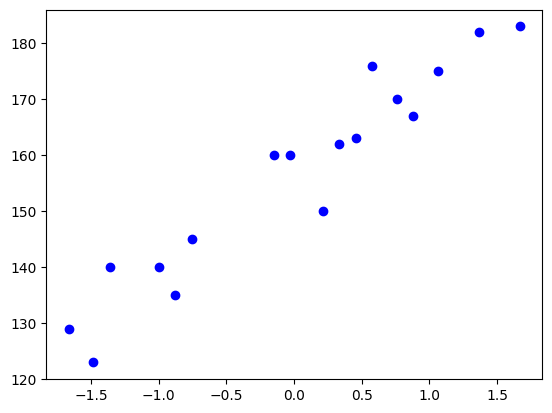

In [43]:
plt.scatter(X_train, y_train, color='blue', label='Actual')

In [44]:
#model training
from sklearn.linear_model import LinearRegression
#parameters
#fit_intercept-- by default it is true, if false then the model will not calculate the intercept for this model, i.e model will be forced to go through the origin
# copy_x = True, if false then the model will not copy the x data, i.e it will not create a copy of the x data
#n_jobs = -1, use all processors
#positive coef_ means that the model is predicting a positive relationship between the features and the target variable, i.e as the feature increases, the target variable also increases-- unnecessary for this model as we are using only one feature

#fit - train the model
#predict - test the model

#after building the model u have attributes of the model
#intercept_ = the intercept of the model, i.e the value of y when x = 0
#coef_ = the coefficient of the model, i.e the slope of the line, i.e the change in y for a unit change in x

model = LinearRegression()
model

LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
model.coef_

array([17.2982057])

In [47]:
model.intercept_

np.float64(156.47058823529412)

In [48]:
#prediction on test data
#let's try on train data

y_pred_train = model.predict(X_train)
y_pred_train[:5]

array([141.30649667, 185.31934779, 162.26499721, 130.82724641,
       180.07972266])

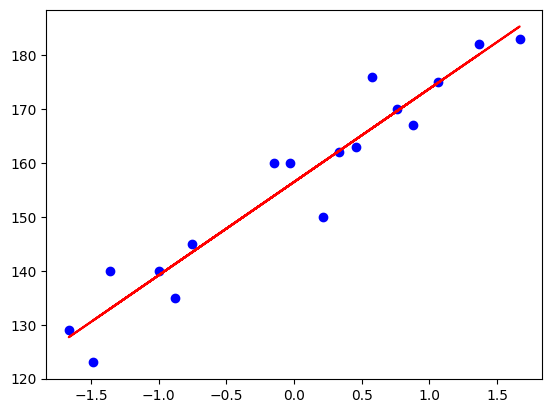

In [49]:
plt.scatter(X_train, y_train, color='blue', label='Actual')

plt.plot(X_train, y_pred_train, color='red', label='Predicted')

In [50]:
y_pred_test = model.predict(X_test)
y_pred_test[:5]

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186])

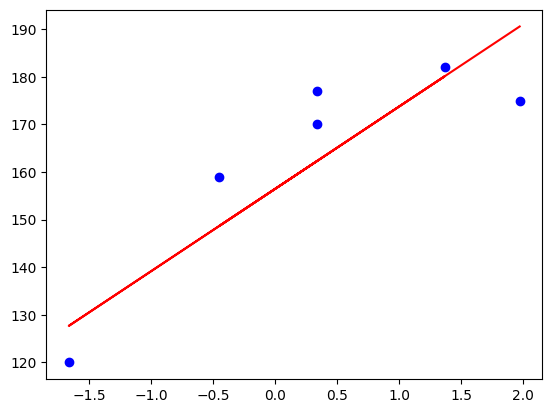

In [51]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_test, color='red', label='Predicted')

In [52]:
#performning evaluation on the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_absolute_error(y_test, y_pred_test)

9.66512588679501

In [53]:
mean_squared_error(y_test, y_pred_test)

114.84069295228699

In [55]:
r2 = r2_score(y_test, y_pred_test)
r2

0.7360826717981276

In [56]:
#adjusted r2 score
#r2 score is not a good metric for evaluating the model as it is not a good metric for evaluating the model as it does not take into account the number of features in the model, i.e it does not penalize the model for using more features
#adjusted r2 score = 1 - (1 - r2) * (n - 1) / (n - p - 1)
#where n = number of samples, p = number of features
1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.6701033397476595

In [ ]:
#assumptions
#1. linearity - the relationship between the features and the target variable is linear
#2. homoscedasticity - the variance of the errors is constant across all values of x
#3. normality - the errors are normally distributed
#4. independence - the errors are independent of each other
#5. no multicollinearity - the features are not highly correlated with each other

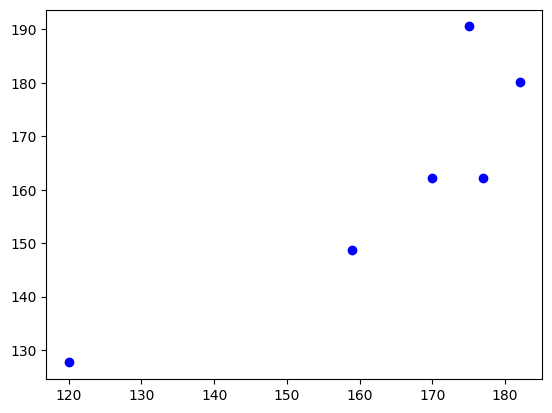

In [ ]:
plt.scatter(y_test, y_pred_test, color='blue', label='Actual')
# 3to check if y_test and y_pred_test align

In [58]:
#error should have contant variation
#error should be normally distributed
error = y_test - y_pred_test
error

15    14.735003
9      7.735003
0     -7.683471
8      1.920277
17    10.358028
12   -15.558973
Name: Height, dtype: float64

C:\Users\asus\AppData\Local\Temp\ipykernel_24236\17153106.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error, bins=20, kde=True)


<Axes: xlabel='Height', ylabel='Density'>

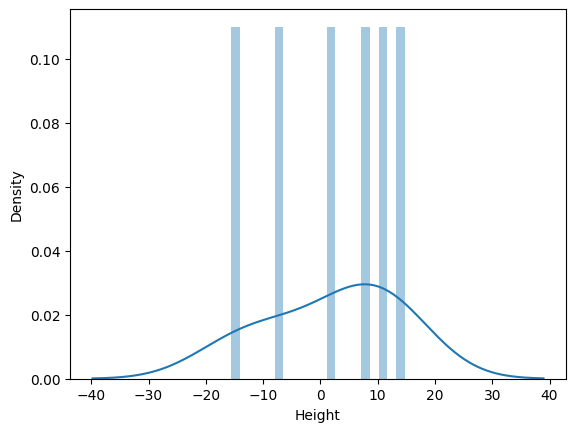

In [63]:
import seaborn as sns
sns.distplot(error, bins=20, kde=True)

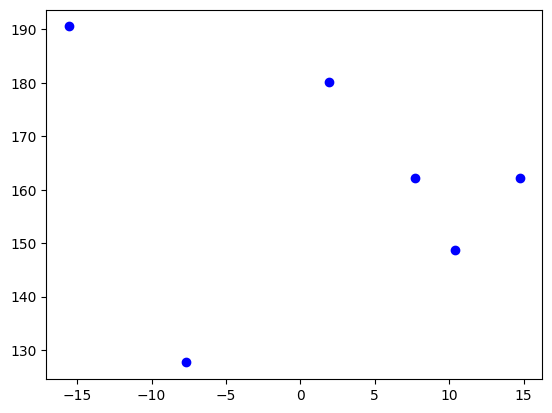

In [ ]:
plt.scatter(error, y_pred_test, color='blue', label='Actual')
#to check constant variation of error
#randomly distributed error